In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 
    
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# retrieve US data jobs
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop NaN values from column for plotting
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

743217     58000.0
27105      92050.0
167630    102500.0
543069     90000.0
198829     65000.0
178465    174040.0
461842     80000.0
601752    125540.0
460478    120710.0
89291      63991.0
Name: salary_year_avg, dtype: float64

<Axes: >

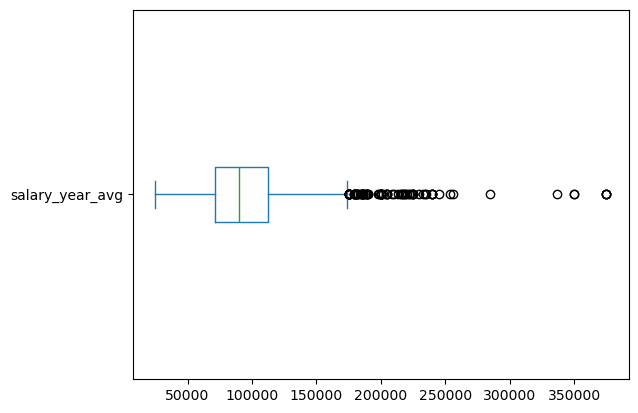

In [5]:
df_DA_US['salary_year_avg'].plot(kind = 'box', vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2140b1e13d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2140b1e2750>,
 'boxes': [<matplotlib.lines.Line2D at 0x2140b1e0b50>],
 'medians': [<matplotlib.lines.Line2D at 0x2140b1e3c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2142f550290>],
 'means': []}

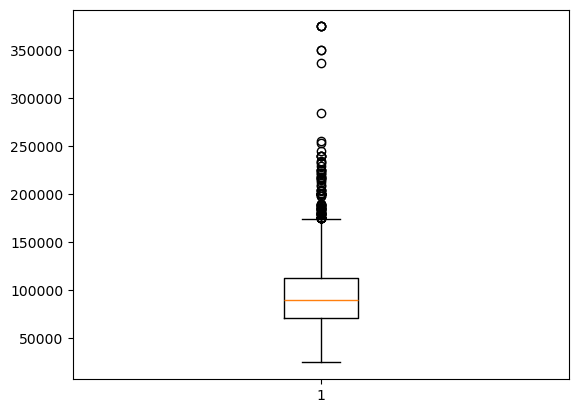

In [4]:
plt.boxplot(df_DA_US['salary_year_avg'])

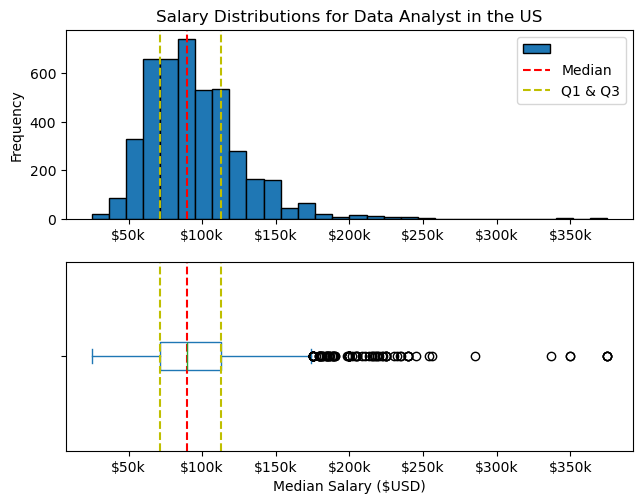

In [6]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

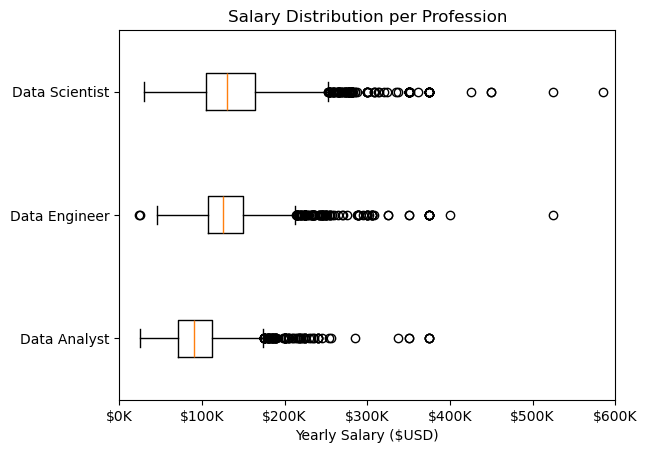

In [15]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']


# filter data to required job titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

# drops NaN values in salary_year_avg column
df_US = df_US.dropna(subset = ['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels = job_titles, vert = False)
plt.title('Salary Distribution per Profession')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlim(0, 600000)
plt.show()